# Google Play Store Apps Data
<HR>

Source : https://www.kaggle.com/lava18/google-play-store-apps

The end-goal for the project is to use this limited data to find interesting patterns about user-behavior & look at what makes an app popular? Can we predict the popularity of an app? 

I've divided the project into two parts :
<OL><LI> <B>Data Cleaning  & Exploration</B> : Here I've cleaned the dataset and then proceeded with answering some interesting questions about the data</LI>
    <li> <B>Modelling to predict installs</B>  : The EDA helps in inferring that apps behave in groups. To understand app behavior better, I bucketed the installs into categories and built the following models/methodologies to predict the install buckets: <ol><li>Logistic Regression</LI>
    <li>Decision Tree</LI>
    <li>Random Forest</LI>
    <li>Hypertuned Random Forest using RandomizedSearchCV </LI>
       </LI>
     

##  Part I : Data Cleaning & Exploration

<H5> Importing packages and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
apps_df=pd.read_csv("googleplaystore.csv",header=0)

<H5>Counting the nulls

In [3]:
nas_apps=apps_df.isna().sum().reset_index()
nas_apps['%Nulls']=nas_apps[0]*100/len(apps_df)
nas_apps.columns=['Columns','Nulls','%Nulls']
nas_apps

,Columns,Nulls,%Nulls
0,App,0,0.000000
1,Category,0,0.000000
2,Rating,1474,13.596532
3,Reviews,0,0.000000
4,Size,0,0.000000
5,Installs,0,0.000000
6,Type,1,0.009224
7,Price,0,0.000000
8,Content Rating,1,0.009224
9,Genres,0,0.000000


In [4]:
apps_sentiment_df=pd.read_csv("googleplaystore_user_reviews.csv",header=0)

<H5> What are the no. of unique apps?

In [5]:
len(apps_sentiment_df['App'].unique())

1074

<H5> Nulls in sentiment data

In [6]:
nas_sentiment=apps_sentiment_df.isna().sum().reset_index()
nas_sentiment['%Nulls']=nas_sentiment[0]*100/len(apps_sentiment_df)
nas_sentiment.columns=['Columns','Nulls','%Nulls']
nas_sentiment

,Columns,Nulls,%Nulls
0,App,0,0.000000
1,Translated_Review,26868,41.788631
2,Sentiment,26863,41.780854
3,Sentiment_Polarity,26863,41.780854
4,Sentiment_Subjectivity,26863,41.780854


<H5> No of unique apps left after removing the nulls from the sentiment data

In [7]:
len(apps_sentiment_df.dropna()['App'].unique())

865

 <BR><HR><H3>Cleaning Data <HR>

In [8]:
len(apps_df)-len(apps_df[apps_df['Rating'].between(0,5)])

1475

In [9]:
apps_df['Current Ver'] = apps_df['Current Ver'].fillna(apps_df['Current Ver'].mode()[0])
apps_df['Android Ver'] = apps_df['Android Ver'].fillna(apps_df['Android Ver'].mode()[0])
apps_df['Content Rating'] = apps_df['Content Rating'].fillna(apps_df['Content Rating'].mode()[0])

In [10]:
apps_df=apps_df[apps_df['Rating'].between(0,5)]
apps_df['Installs']=apps_df['Installs'].map(lambda x : int(x[:-1].replace(",","")))

<H5> What are the top 10 highly rated categories for free apps?

In [11]:
apps_df2=apps_df.dropna()

In [12]:
apps_free=apps_df[apps_df['Type']=="Free"]
apps_paid=apps_df[apps_df['Type']=="Paid"]

In [13]:
apps_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,1000,Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17M,100,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,Varies with device,10000,Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
851,Sago Mini Hat Maker,EDUCATION,4.9,11,63M,1000,Paid,$3.99,Everyone,Education;Pretend Play,"July 24, 2017",1,4.0.3 and up


In [14]:
mean_ratings_by_category=apps_free.groupby(['Category'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_10_rated=mean_ratings_by_category[:10]
top_10_rated

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.379470
2,BOOKS_AND_REFERENCE,4.349412
3,PARENTING,4.339583
4,ART_AND_DESIGN,4.338983
5,PERSONALIZATION,4.307287
6,GAME,4.279804
7,BEAUTY,4.278571
8,HEALTH_AND_FITNESS,4.272281
9,SOCIAL,4.259922


Text(0.5, 1.0, 'Top Rated Categories for Free Apps')

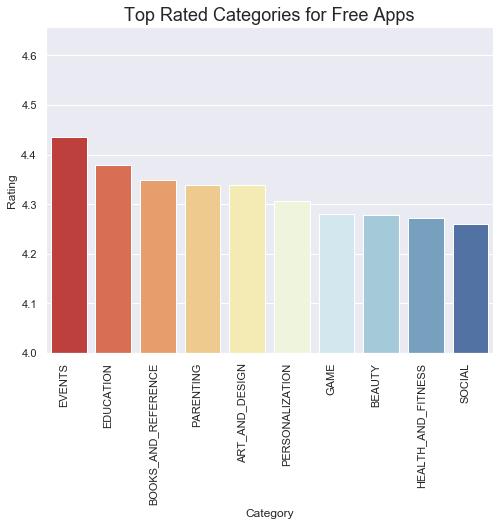

In [15]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Category",y ="Rating",data=top_10_rated, palette = "RdYlBu")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
#category_plot.plt.ylim(0, 5)

category_plot.set(ylim=(4, None))
plt.title('Top Rated Categories for Free Apps',size = 18)

Average Rating Paid Apps

<H5> What are the top 10 most installed categories? (Free)

In [16]:
installs_per_category=apps_free.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
top_10_installed=installs_per_category[:10]
top_10_installed

,Category,Installs
0,GAME,35064763455
1,COMMUNICATION,32645881530
2,PRODUCTIVITY,14174659370
3,SOCIAL,14069835475
4,TOOLS,11448997680
5,FAMILY,10226432760
6,PHOTOGRAPHY,10084264610
7,NEWS_AND_MAGAZINES,7496205150
8,TRAVEL_AND_LOCAL,6868677300
9,VIDEO_PLAYERS,6221826200


In [17]:
import seaborn as sns

Text(0.5, 1.0, 'Top Installed Categories for Free Apps')

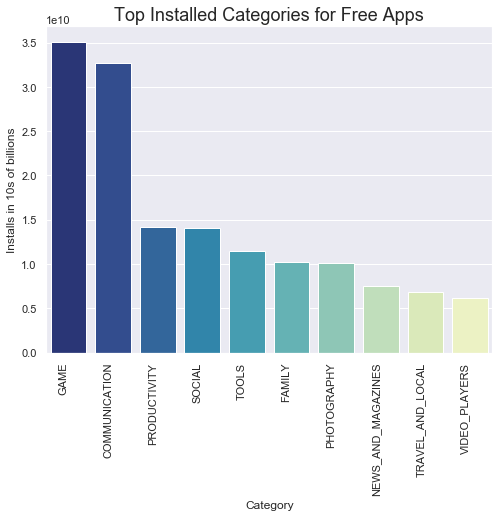

In [18]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Category",y ="Installs",data=top_10_installed, palette = "YlGnBu_r")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot.set(ylabel='Installs in 10s of billions')
plt.title('Top Installed Categories for Free Apps',size = 18)
#plt.savefig("phrase_neg.svg", format='svg', dpi=1200)

<H5> We see that mean ratings are highest for categories that are not all the same as those which have highest installs too, INTERESTING!

<H5> What are the top 10 most installed genres for free apps?

In [19]:
installs_per_genres=apps_free.groupby(['Genres'])['Installs'].sum().sort_values(ascending=False).reset_index()
top_10_installed=installs_per_genres[:10]
top_10_installed

,Genres,Installs
0,Communication,32645881530
1,Productivity,14174659370
2,Social,14069835475
3,Tools,11438997680
4,Arcade,10725640515
5,Photography,10084264610
6,Casual,9662746860
7,Action,9324985220
8,News & Magazines,7496205150
9,Travel & Local,6868577300


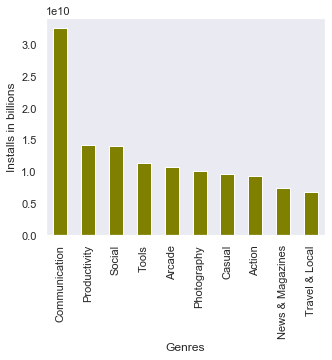

In [20]:
from matplotlib.pyplot import *
top_10_installed.plot(x='Genres',y='Installs',kind="Bar", color="Olive", legend=False,figsize=(5,4))
xlabel("Genres")
ylabel("Installs in billions")
plt.grid()


<H5> Is the bottom-line rating for apps higher as they get more installs?

<H5> Let's check the correlation of installs and mean ratings for the apps to confirm this.

In [21]:
apps_df[['Installs','Rating']].corr()

,Installs,Rating
Installs,1.000000,0.051355
Rating,0.051355,1.000000


In [22]:
def installBuckets(x):
    if x<=10000:
        return "Not so popular"
    elif (x>10000 and x<=1000000):
        return "Intermediate popular"
    elif (x>1000000 and x<=5000000) :
        return "Highly Popular"
    elif x>5000000:
        return "Extremely Popular"
    
apps_df['Installs Buckets']=apps_df['Installs'].map(installBuckets)

In [23]:
installs_vs_ratings=apps_df.groupby('Installs Buckets')['Rating'].min().sort_values()

In [24]:
installs_vs_ratings=installs_vs_ratings.reset_index()
installs_vs_ratings.columns=['Install Buckets','Min Rating']

In [25]:
installs_vs_ratings

,Install Buckets,Min Rating
0,Not so popular,1.0
1,Intermediate popular,1.6
2,Highly Popular,2.0
3,Extremely Popular,3.0


Text(0.5, 1.0, 'Min Rating for Install Buckets')

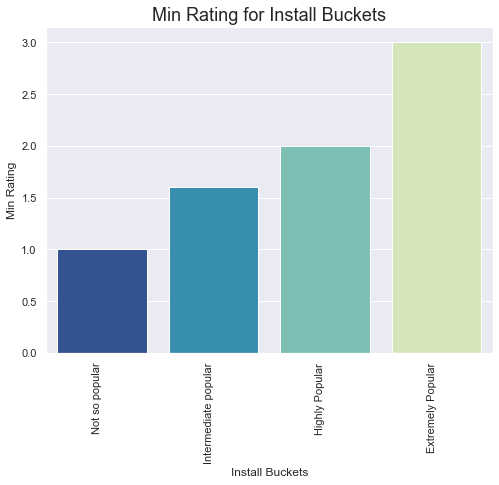

In [26]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
category_plot = sns.barplot(x="Install Buckets",y ="Min Rating",data=installs_vs_ratings, palette = "YlGnBu_r")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
plt.title('Min Rating for Install Buckets',size = 18)

<H5> Min rating increases for apps that have higher installs

<hr>

## Part II : Modelling to predict the install buckets

<hr>

<h3> Logistic Regression

In [27]:
from sklearn.metrics import confusion_matrix
    
play_store_df=apps_df

logistic_df=play_store_df[['Installs','Reviews','Category','Content Rating','Type','Genres','Size']]
logistic_df=pd.get_dummies(logistic_df)
logistic_df['Installs']=logistic_df['Installs'].map(installBuckets)

In [28]:
logistic_df.dropna(inplace=True)

X=logistic_df.drop('Installs',axis=1)
y=logistic_df['Installs'].values
y=y.astype('str')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.571504802561366


<H5> Logistic Regression Confusion Matrix

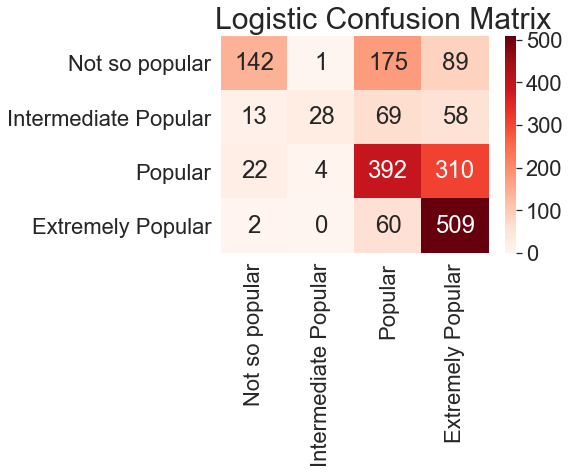

In [29]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Logistic Confusion Matrix', fontsize=30)
sns.heatmap(lr_cm,xticklabels=["Not so popular","Intermediate Popular","Popular","Extremely Popular"],yticklabels=["Not so popular","Intermediate Popular","Popular","Extremely Popular"],annot=True,cmap="Reds",fmt="d")

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
accuracy_score(dtree_pred,y_test)


0.6494130202774814

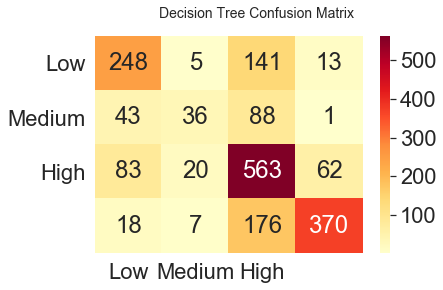

In [31]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Decision Tree Confusion Matrix', fontsize=14)
sns.heatmap(dtree_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlOrRd",fmt="d")

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
rdf_ac

0.6184631803628602

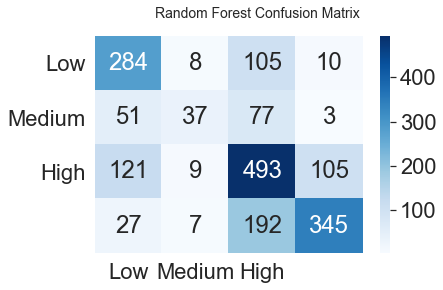

In [33]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Blues",fmt="d")

### Randomized Search CV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 50.8min


KeyboardInterrupt: 

In [ ]:
rdf_c=RandomForestClassifier(n_estimators=1200,criterion='entropy',random_state=0,max_depth=7, min_samples_leaf= 2,min_samples_split=5,max_features='sqrt')
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
rdf_ac

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix with Tuning', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlGn",fmt="d")